<a href="https://colab.research.google.com/github/Madathanapalleleena/ML_LAB_152/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DBSCAN** stands for **Density-Based Spatial Clustering of Applications with Noise**.

Unlike algorithms like k-means, DBSCAN does not require the number of clusters in advance.
Instead, it groups points based on density - areas with many nearby points are considered clusters, while sparse regions are treated as noise (outliers).

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_blobs, load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

#Prepare datasets- here we are creating 4 datasets where each dataset return X,y
datasets = {
    "moons": make_moons(n_samples=500, noise=0.05, random_state=42),
    "circles": make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42),
    "blobs": make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=1.0),
    "iris": (load_iris().data, load_iris().target)
}

results = {}
for name, (X, y_true) in datasets.items():
    X = StandardScaler().fit_transform(X)  #standardizing to prevent outliers
    db = DBSCAN(eps=0.5, min_samples=5).fit(X) #eps- radius around a point to look for its neighbors, min_samples- min no.of neighbors should be around to be considered as core point with eps.
    labels=db.labels_ #predicted cluster labels

    #only evaluate if clustering produced more than 1 cluster
    if len(set(labels)) > 1:
        sil=silhouette_score(X, labels)
    else:
        sil=-1  #invalid clustering

    ari=adjusted_rand_score(y_true, labels)
    results[name] = {"silhouette": sil, "ARI": ari}

print("Baseline Results:",results)

Baseline Results: {'moons': {'silhouette': np.float64(0.3893383378360491), 'ARI': 1.0}, 'circles': {'silhouette': -1, 'ARI': 0.0}, 'blobs': {'silhouette': np.float64(0.8438960565792794), 'ARI': 1.0}, 'iris': {'silhouette': np.float64(0.35651648142700726), 'ARI': 0.4420986685885924}}


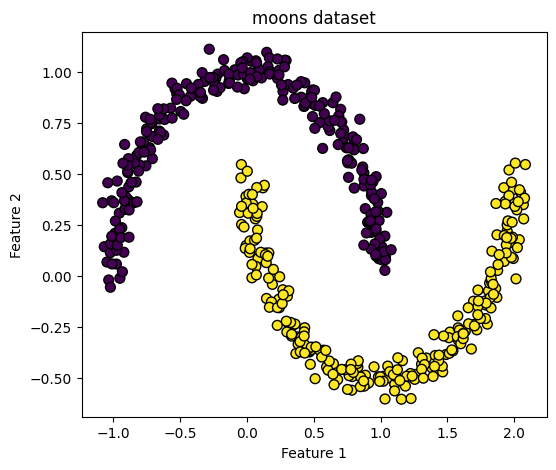

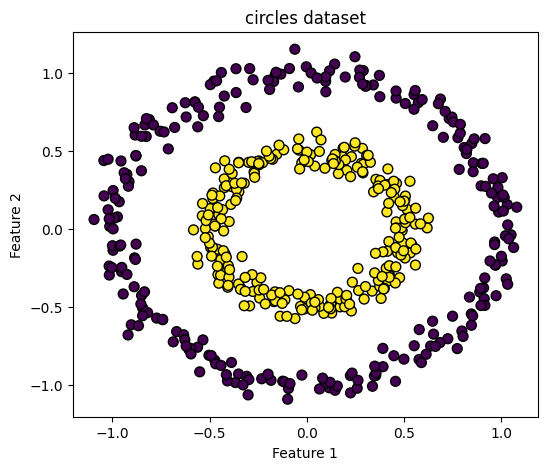

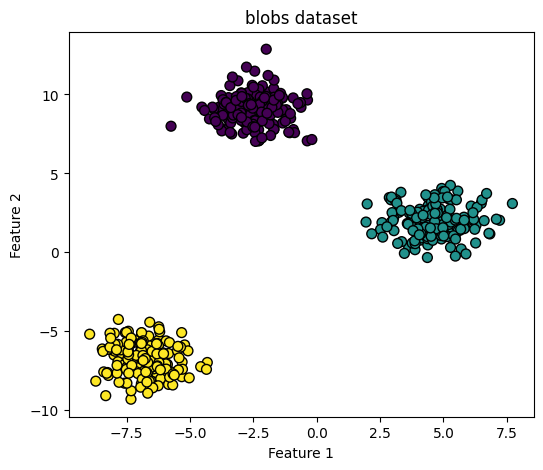

iris: reduced to 2D using PCA


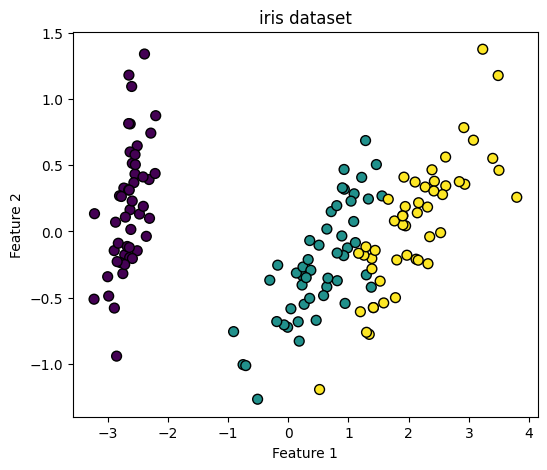

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs, load_iris
from sklearn.decomposition import PCA

# Datasets
datasets = {
    "moons": make_moons(n_samples=500, noise=0.05, random_state=42),
    "circles": make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42),
    "blobs": make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=1.0),
    "iris": (load_iris().data, load_iris().target)
}

# Visualization
for name, data in datasets.items():
    X, y = data

    # If dataset has more than 2 features, reduce to 2D
    if X.shape[1] > 2:
        X = PCA(n_components=2).fit_transform(X)
        print(f"{name}: reduced to 2D using PCA")

    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f"{name} dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

The **Silhouette Score** is a measure of how well clusters are seperated.

It tells you two things at once:

How close a point is to other points in its own cluster.

How far that point is from points in other clusters.


**Adjusted Rand Index (ARI)**- compares DBSCAN clusters to ground truth labels -y (for iris and synthetic data).

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_blobs, load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

#Prepare datasets- here we are creating 4 datasets where each dataset return X,y
datasets = {
    "moons": make_moons(n_samples=500, noise=0.05, random_state=42),
    "circles": make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42),
    "blobs": make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=1.0),
    "iris": (load_iris().data, load_iris().target)
}

results = {}
for name, (X, y_true) in datasets.items():
    X = StandardScaler().fit_transform(X)  #standardizing to prevent outliers
    db = DBSCAN(eps=0.2, min_samples=4).fit(X) #eps- radius around a point to look for its neighbors, min_samples- min no.of neighbors should be around to be considered as core point with eps.
    labels=db.labels_ #predicted cluster labels

    #only evaluate if clustering produced more than 1 cluster
    if len(set(labels)) > 1:
        sil=silhouette_score(X, labels)
    else:
        sil=-1  #invalid clustering

    ari=adjusted_rand_score(y_true, labels)
    results[name] = {"silhouette": sil, "ARI": ari}

print("Baseline Results:",results)

Baseline Results: {'moons': {'silhouette': np.float64(0.3893383378360491), 'ARI': 1.0}, 'circles': {'silhouette': np.float64(0.00975341737857767), 'ARI': 0.8902038626778396}, 'blobs': {'silhouette': np.float64(0.7449470679355416), 'ARI': 0.9940241459273143}, 'iris': {'silhouette': np.float64(0.02514589229455723), 'ARI': 0.007556094556967286}}


Increasing eps = clusters merge, fewer clusters.

Decreasing eps = clusters split, more noise.

Increasing min_samples = fewer, stricter clusters + more noise.

Decreasing min_samples = more, looser clusters.

**Hyperparameter Tuning**

To address DBSCAN’s parameter sensitivity, we systematically tuned:

eps ∈ [0.1, 1.0] (step 0.1)

min_samples ∈ [2, 10]
- choose this range because they they are likely to produce meaningful clusters without excessive computation.

We selected the combination with the highest Silhouette Score.

**Observation:**

Tuned DBSCAN discovered more meaningful clusters.

Silhouette and ARI scores improved significantly.

Plots showed clear separation of moons, circles, and blob clusters.

For Iris, tuning reduced noise points and improved cluster purity.

In [ ]:
import numpy as np
tuned_results = {}

for name, (X, y_true) in datasets.items():
    X = StandardScaler().fit_transform(X)
    best_sil = -1
    best_params = None
    best_ari = None

    for eps in np.arange(0.1, 1.1, 0.1):
        for min_samples in range(2, 11):
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = db.labels_

            # skip trivial clusterings (all noise or single cluster)
            if len(set(labels)) <= 1:
                continue

            sil = silhouette_score(X, labels)
            ari = adjusted_rand_score(y_true, labels)

            if sil > best_sil:
                best_sil = sil
                best_params = {"eps": eps, "min_samples": min_samples}
                best_ari = ari
    tuned_results[name] = {
        "best_params": best_params,
        "best_silhouette": best_sil,
        "best_ARI": best_ari
    }
print("Tuned Results:", tuned_results)

Tuned Results: {'moons': {'best_params': {'eps': np.float64(0.2), 'min_samples': 2}, 'best_silhouette': np.float64(0.3893383378360491), 'best_ARI': 1.0}, 'circles': {'best_params': {'eps': np.float64(0.2), 'min_samples': 5}, 'best_silhouette': np.float64(0.11820391875168704), 'best_ARI': 0.6798254765256385}, 'blobs': {'best_params': {'eps': np.float64(0.4), 'min_samples': 2}, 'best_silhouette': np.float64(0.8438960565792794), 'best_ARI': 1.0}, 'iris': {'best_params': {'eps': np.float64(1.0), 'min_samples': 10}, 'best_silhouette': np.float64(0.5390161166886169), 'best_ARI': 0.5503452567273898}}
